# Delphes Data Exploration

Let's develop some code for exploring the Delphes data files.

In [6]:
# System imports
from __future__ import print_function
import os
import re

# Externals
import numpy as np
import root_numpy as rnp
import matplotlib.pyplot as plt

%matplotlib notebook

## Loading the data

Let's locate the input delphes ROOT files and start playing with a few of them.

In [2]:
# The current ROOT files are here (not accessible from PDSF)
input_file_dir = '/global/cscratch1/sd/wbhimji/DelphesOutput/PU-HighRes-2'

In [21]:
all_files = os.listdir(input_file_dir)
qcd_files = [os.path.join(input_file_dir, f) for f in all_files if re.match('QCDBkg_JZ5.*root$', f)]
rpv_files = [os.path.join(input_file_dir, f) for f in all_files if re.match('RPV.*1400_850.*root$', f)]

print('QCD files:\n ', '\n  '.join(qcd_files))
print('RPV files:\n ', '\n  '.join(rpv_files))

QCD files:
  /global/cscratch1/sd/wbhimji/DelphesOutput/PU-HighRes-2/QCDBkg_JZ5_800_1300-10k-PU-HighRes-2-2-5-1.root
  /global/cscratch1/sd/wbhimji/DelphesOutput/PU-HighRes-2/QCDBkg_JZ5_800_1300-10k-PU-HighRes-2-2-1-16.root
  /global/cscratch1/sd/wbhimji/DelphesOutput/PU-HighRes-2/QCDBkg_JZ5_800_1300-10k-PU-HighRes-2-2-11-29.root
  /global/cscratch1/sd/wbhimji/DelphesOutput/PU-HighRes-2/QCDBkg_JZ5_800_1300-10k-PU-HighRes-2-2-7-29.root
  /global/cscratch1/sd/wbhimji/DelphesOutput/PU-HighRes-2/QCDBkg_JZ5_800_1300-10k-PU-HighRes-2-2-5-9.root
  /global/cscratch1/sd/wbhimji/DelphesOutput/PU-HighRes-2/QCDBkg_JZ5_800_1300-10k-PU-HighRes-2-2-9-2.root
  /global/cscratch1/sd/wbhimji/DelphesOutput/PU-HighRes-2/QCDBkg_JZ5_800_1300-10k-PU-HighRes-2-1-1-1.root
  /global/cscratch1/sd/wbhimji/DelphesOutput/PU-HighRes-2/QCDBkg_JZ5_800_1300-10k-PU-HighRes-2-2-5-5.root
  /global/cscratch1/sd/wbhimji/DelphesOutput/PU-HighRes-2/QCDBkg_JZ5_800_1300-10k-PU-HighRes-2-2-11-3.root
  /global/cscratch1/sd/wbhimji

Let's start by just playing with one file of each.

In [22]:
qcd_file = qcd_files[0]
rpv_file = rpv_files[0]

branch_dict = {
    'Tower.Eta' : 'clusEta',
    'Tower.Phi' : 'clusPhi',
    'Tower.E' : 'clusE',
    'Tower.Eem' : 'clusEM',
    'FatJet.PT' : 'fatJetPt',
    'FatJet.Eta' : 'fatJetEta',
    'FatJet.Phi' : 'fatJetPhi',
    'FatJet.Mass' : 'fatJetM',
    'Track.Eta' : 'trackEta',
    'Track.Phi' : 'trackPhi',
    'Track.PT' : 'trackPt',
}
qcd_data = rnp.root2array(qcd_file, branches=branch_dict.keys(), treename='Delphes');
rpv_data = rnp.root2array(rpv_file, branches=branch_dict.keys(), treename='Delphes');

# Rename the branches
qcd_data.dtype.names = branch_dict.values()
rpv_data.dtype.names = branch_dict.values()

TClass::Init:0: RuntimeWarning: no dictionary for class HepMCEvent is available
TClass::Init:0: RuntimeWarning: no dictionary for class Event is available
TClass::Init:0: RuntimeWarning: no dictionary for class GenParticle is available
TClass::Init:0: RuntimeWarning: no dictionary for class SortableObject is available
TClass::Init:0: RuntimeWarning: no dictionary for class Tower is available
TClass::Init:0: RuntimeWarning: no dictionary for class Jet is available
TClass::Init:0: RuntimeWarning: no dictionary for class MissingET is available
TClass::Init:0: RuntimeWarning: no dictionary for class Electron is available
TClass::Init:0: RuntimeWarning: no dictionary for class Photon is available
TClass::Init:0: RuntimeWarning: no dictionary for class Muon is available
TClass::Init:0: RuntimeWarning: no dictionary for class ScalarHT is available
TClass::Init:0: RuntimeWarning: no dictionary for class Rho is available
TClass::Init:0: RuntimeWarning: no dictionary for class Vertex is availabl

Inspect the contents of the file.

In [24]:
print(qcd_data.dtype)

[('trackEta', 'O'), ('clusEta', 'O'), ('trackPhi', 'O'), ('trackPt', 'O'), ('fatJetPhi', 'O'), ('fatJetEta', 'O'), ('fatJetM', 'O'), ('fatJetPt', 'O'), ('clusEM', 'O'), ('clusPhi', 'O'), ('clusE', 'O')]


## Plot some raw file quantities

In [25]:
def draw_clusters(event):
    eta, phi, e = event['clusEta'], event['clusPhi'], event['clusE']
    plt.scatter(eta, phi, c=np.log(e), s=25, vmin=0, vmax=6, cmap='hot')
    plt.xlim((-5,5))
    plt.ylim((-3.15, 3.15))
    plt.xlabel('Cluster $\eta$')
    plt.ylabel('Cluster $\phi$')
    cbar = plt.colorbar()
    cbar.set_label('log(E)')

def draw_fat_jets(event, num_jets=5):
    pt, eta, phi = event['fatJetPt'], event['fatJetEta'], event['fatJetPhi']
    idx = np.argsort(pt)[::-1]
    if num_jets < 0 or num_jets > len(pt):
        num_jets = len(pt)
    for i in idx[:num_jets]:
        circle = plt.Circle((eta[i], phi[i]), radius=1,
                            edgecolor='b', linewidth=1.5,
                            facecolor='none')
        plt.gcf().gca().add_artist(circle)

def draw_tracks(event):
    pt, eta, phi = event['trackPt'], event['trackEta'], event['trackPhi']
    plt.scatter(eta, phi, c=np.log(pt), s=25, vmin=0, vmax=5, cmap='hot')
    plt.xlim((-2.5, 2.5))
    plt.ylim((-3.15, 3.15))
    plt.xlabel('Track $\eta$')
    plt.ylabel('Track $\phi$')
    cbar = plt.colorbar()
    cbar.set_label('log($p_T$)')

QCD event clusters:


<IPython.core.display.Javascript object>


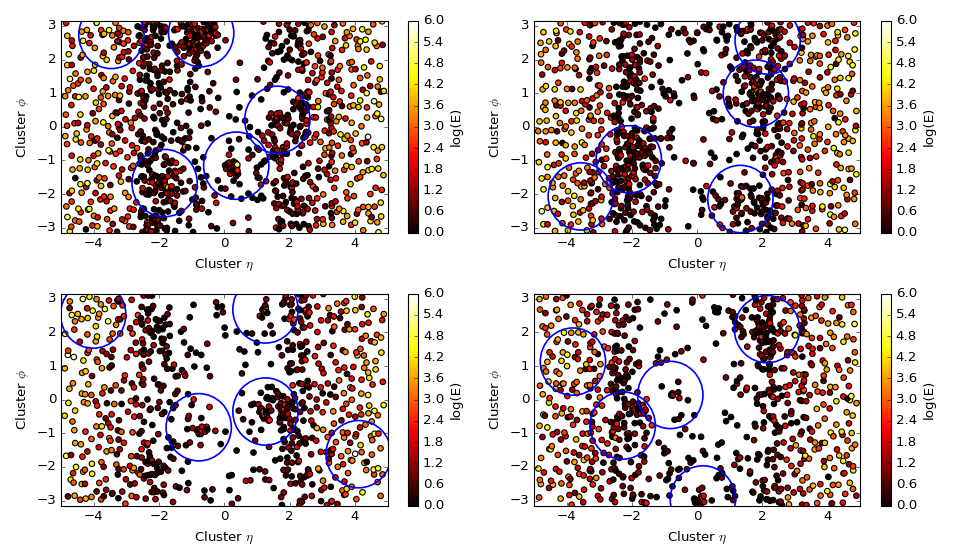

RPV event clusters:


<IPython.core.display.Javascript object>


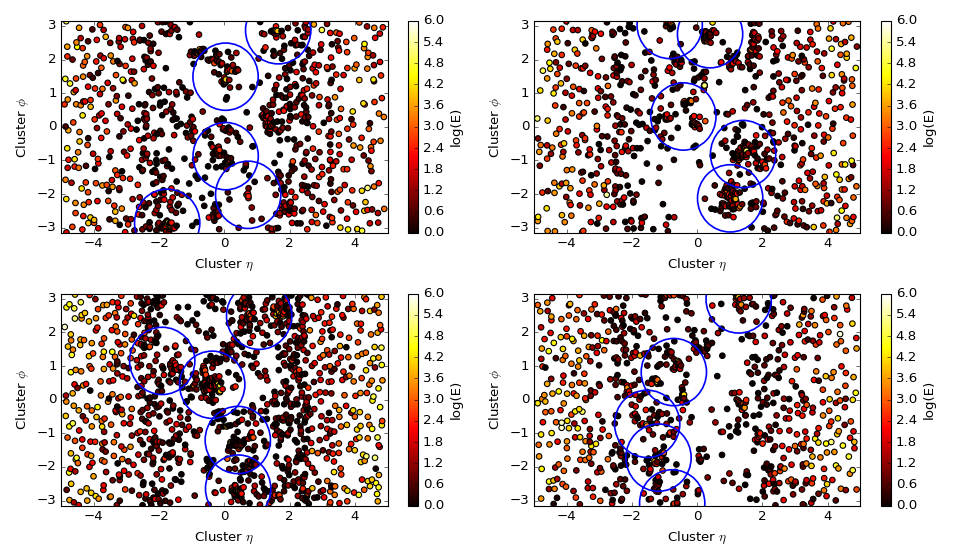

In [26]:
# Draw the clusters for few events

print('QCD event clusters:')
plt.figure(figsize=(12,7))
for i in range(4):
    plt.subplot(2,2,i+1)
    draw_clusters(qcd_data[i])
    draw_fat_jets(qcd_data[i])
plt.tight_layout()

print('RPV event clusters:')
plt.figure(figsize=(12,7))
for i in range(4):
    plt.subplot(2,2,i+1)
    draw_clusters(rpv_data[i])
    draw_fat_jets(rpv_data[i])
plt.tight_layout()

These look kind of strange. Wahid agreed (called them "bat shit crazy"), so he's going to look again at what happened there.

QCD tracks:


<IPython.core.display.Javascript object>


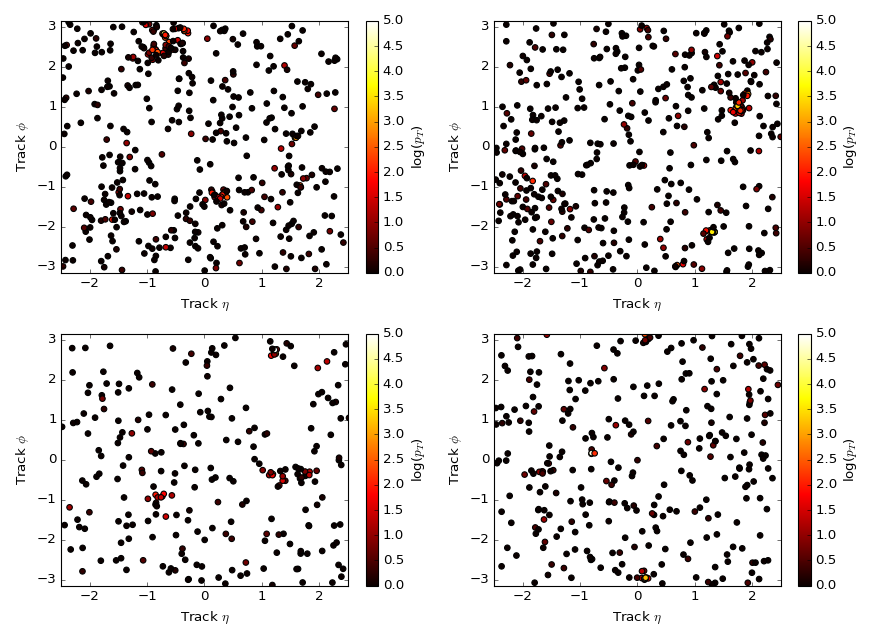

RPV tracks:


<IPython.core.display.Javascript object>


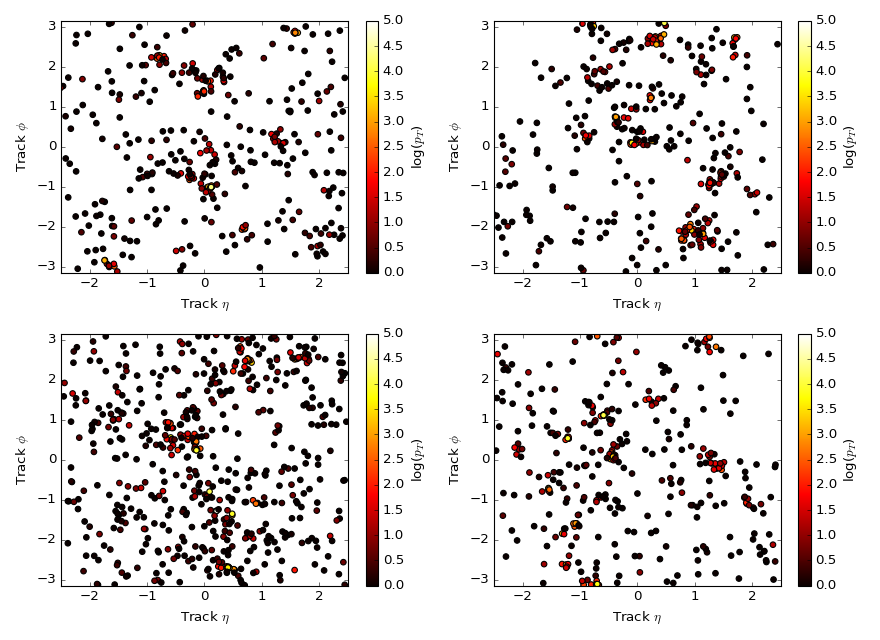

In [27]:
# Draw the tracks

print('QCD tracks:')
plt.figure(figsize=(11,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    draw_tracks(qcd_data[i])
plt.tight_layout()

print('RPV tracks:')
plt.figure(figsize=(11,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    draw_tracks(rpv_data[i])
plt.tight_layout()

<IPython.core.display.Javascript object>


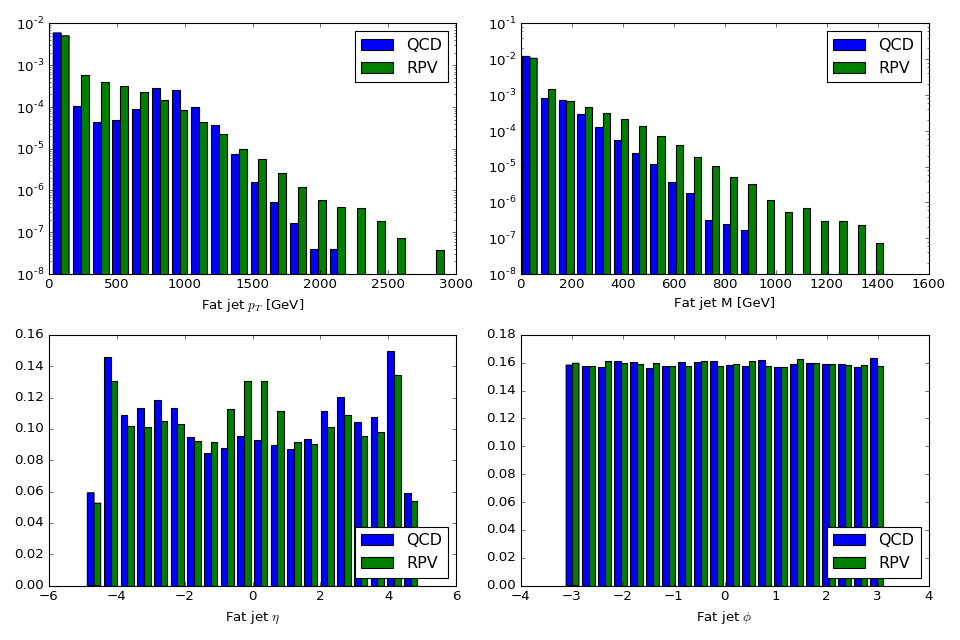

In [28]:
# Plot the fat jet distributions

qcd_pt = np.concatenate(qcd_data['fatJetPt'])
qcd_eta = np.concatenate(qcd_data['fatJetEta'])
qcd_phi = np.concatenate(qcd_data['fatJetPhi'])
qcd_m = np.concatenate(qcd_data['fatJetM'])
rpv_pt = np.concatenate(rpv_data['fatJetPt'])
rpv_eta = np.concatenate(rpv_data['fatJetEta'])
rpv_phi = np.concatenate(rpv_data['fatJetPhi'])
rpv_m = np.concatenate(rpv_data['fatJetM'])

hist_args = dict(bins=20, alpha=1, normed=True)
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist([qcd_pt, rpv_pt], log=True, label=['QCD', 'RPV'], **hist_args)
plt.xlabel('Fat jet $p_T$ [GeV]')
#plt.xlim(0, 3000)
plt.legend(loc=0)
plt.subplot(2,2,2)
plt.hist([qcd_m, rpv_m], log=True, label=['QCD', 'RPV'], **hist_args)
plt.xlabel('Fat jet M [GeV]')
plt.legend(loc=0)
plt.subplot(2,2,3)
plt.hist([qcd_eta, rpv_eta], label=['QCD', 'RPV'], **hist_args)
plt.xlabel('Fat jet $\eta$')
plt.legend(loc=4)
plt.subplot(2,2,4)
plt.hist([qcd_phi, rpv_phi], label=['QCD', 'RPV'], **hist_args)
plt.xlabel('Fat jet $\phi$')
plt.legend(loc=4)

plt.tight_layout()